In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('CrudeCounty2021.csv')

In [532]:
print(df)

      year   county     zipcode        rate       num1        num2      num3
0     2021   Alpine      Alpine   67.297500  73.350000  780.767500  33.65000
1     2021   Alpine  California   16.777500  16.377500   17.187500   0.20675
2     2021   Alpine       00044    0.000000        NaN         NaN       NaN
3     2021   Alpine       96120    0.000000   0.000000    0.000000   0.00000
4     2021  Alameda       94612  114.645753  33.203632  294.172985  55.26028
...    ...      ...         ...         ...        ...         ...       ...
1808  2021     Yuba       95919    0.000000   0.000000    0.000000   0.00000
1809  2021     Yuba       95925    0.000000   0.000000    0.000000   0.00000
1810  2021     Yuba       95935    0.000000   0.000000    0.000000   0.00000
1811  2021     Yuba       95962    0.000000   0.000000    0.000000   0.00000
1812  2021     Yuba       95972    0.000000        NaN         NaN       NaN

[1813 rows x 7 columns]


In [533]:
def filter_zipcode(row):
    if row["zipcode"].isdigit():
        return True
    else:
        return False
        

In [534]:
df.apply(filter_zipcode,axis=1)

0       False
1       False
2        True
3        True
4        True
        ...  
1808     True
1809     True
1810     True
1811     True
1812     True
Length: 1813, dtype: bool

In [535]:
df = df[df.apply(filter_zipcode,axis=1)]
print(df)

      year   county zipcode        rate       num1        num2       num3
2     2021   Alpine   00044    0.000000        NaN         NaN        NaN
3     2021   Alpine   96120    0.000000   0.000000    0.000000   0.000000
4     2021  Alameda   94612  114.645753  33.203632  294.172985  55.260280
5     2021  Alameda   94607   39.908302  20.009301   79.693818  11.968339
6     2021  Alameda   94609   38.075039  16.194926   91.165677  13.658295
...    ...      ...     ...         ...        ...         ...        ...
1808  2021     Yuba   95919    0.000000   0.000000    0.000000   0.000000
1809  2021     Yuba   95925    0.000000   0.000000    0.000000   0.000000
1810  2021     Yuba   95935    0.000000   0.000000    0.000000   0.000000
1811  2021     Yuba   95962    0.000000   0.000000    0.000000   0.000000
1812  2021     Yuba   95972    0.000000        NaN         NaN        NaN

[1701 rows x 7 columns]


In [536]:
df=df.drop("num1",axis=1)

In [537]:
df=df.drop("num2",axis=1)

In [538]:
df=df.drop("num3",axis=1)

In [539]:
print(df)

      year   county zipcode        rate
2     2021   Alpine   00044    0.000000
3     2021   Alpine   96120    0.000000
4     2021  Alameda   94612  114.645753
5     2021  Alameda   94607   39.908302
6     2021  Alameda   94609   38.075039
...    ...      ...     ...         ...
1808  2021     Yuba   95919    0.000000
1809  2021     Yuba   95925    0.000000
1810  2021     Yuba   95935    0.000000
1811  2021     Yuba   95962    0.000000
1812  2021     Yuba   95972    0.000000

[1701 rows x 4 columns]


In [540]:
ranges = {"0-10":0, "10-20":0,"20-30":0,"30+":0}
for index,row in df.iterrows():
    if row.rate <10:
        ranges["0-10"] = ranges["0-10"] + 1
    if row.rate < 20 and row.rate>10:
        ranges["10-20"] = ranges["20-30"] + 1
    if row.rate < 30 and row.rate>20:
        ranges["20-30"] = ranges["20-30"] + 1
    else:
        ranges["30+"] = ranges["30+"] + 1

In [541]:
print(ranges)

{'0-10': 846, '10-20': 197, '20-30': 198, '30+': 1503}


<AxesSubplot:>

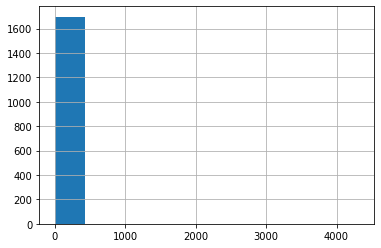

In [542]:
df["rate"].hist(bins=10)

In [543]:
df.describe()

,year,rate
count,1701.0,1701.000000
mean,2021.0,22.885841
std,0.0,127.473892
min,2021.0,0.000000
25%,2021.0,0.000000
50%,2021.0,10.114899
75%,2021.0,21.423479
max,2021.0,4318.962689


In [544]:
from matplotlib import pyplot as plt

<AxesSubplot:>

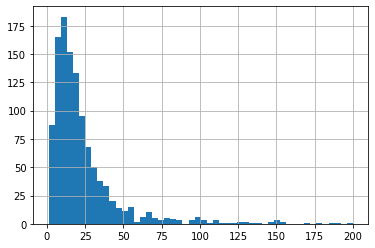

In [545]:
df[(df["rate"]<200) & (df['rate']>0) ]['rate'].hist(bins=50)

In [546]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

<Figure size 1600x480 with 0 Axes>

<Figure size 1600x480 with 0 Axes>

In [547]:
income = pd.read_excel("median_income.xlsx")

In [548]:
print(income)

       Unnamed: 0  Unnamed: 1  Unnamed: 2          GEO_ID  \
0             NaN         NaN         NaN              id   
1             NaN         NaN         NaN  8600000US00601   
2             NaN         NaN         NaN  8600000US00602   
3             NaN         NaN         NaN  8600000US00603   
4             NaN         NaN         NaN  8600000US00606   
...           ...         ...         ...             ...   
33116         NaN         NaN         NaN  8600000US99923   
33117         NaN         NaN         NaN  8600000US99925   
33118         NaN         NaN         NaN  8600000US99926   
33119         NaN         NaN         NaN  8600000US99927   
33120         NaN         NaN         NaN  8600000US99929   

                       NAME                                     S1903_C03_015E  
0      Geographic Area Name  Estimate!!Median income (dollars)!!FAMILIES!!F...  
1               ZCTA5 00601                                              15721  
2               ZCTA5 00

In [549]:
income

,Unnamed: 0,Unnamed: 1,Unnamed: 2,GEO_ID,NAME,S1903_C03_015E
0,NaN,NaN,NaN,id,Geographic Area Name,Estimate!!Median income (dollars)!!FAMILIES!!F...
1,NaN,NaN,NaN,8600000US00601,ZCTA5 00601,15721
2,NaN,NaN,NaN,8600000US00602,ZCTA5 00602,21060
3,NaN,NaN,NaN,8600000US00603,ZCTA5 00603,19340
4,NaN,NaN,NaN,8600000US00606,ZCTA5 00606,16176
...,...,...,...,...,...,...
33116,NaN,NaN,NaN,8600000US99923,ZCTA5 99923,-
33117,NaN,NaN,NaN,8600000US99925,ZCTA5 99925,80139
33118,NaN,NaN,NaN,8600000US99926,ZCTA5 99926,70147
33119,NaN,NaN,NaN,8600000US99927,ZCTA5 99927,-


In [550]:
def filter_income(row):
    if row["NAME"].startswith("G"):
        return False
    else:
        return True

In [551]:
income = income[income.apply(filter_income,axis=1)]

In [552]:
income

,Unnamed: 0,Unnamed: 1,Unnamed: 2,GEO_ID,NAME,S1903_C03_015E
1,NaN,NaN,NaN,8600000US00601,ZCTA5 00601,15721
2,NaN,NaN,NaN,8600000US00602,ZCTA5 00602,21060
3,NaN,NaN,NaN,8600000US00603,ZCTA5 00603,19340
4,NaN,NaN,NaN,8600000US00606,ZCTA5 00606,16176
5,NaN,NaN,NaN,8600000US00610,ZCTA5 00610,23968
...,...,...,...,...,...,...
33116,NaN,NaN,NaN,8600000US99923,ZCTA5 99923,-
33117,NaN,NaN,NaN,8600000US99925,ZCTA5 99925,80139
33118,NaN,NaN,NaN,8600000US99926,ZCTA5 99926,70147
33119,NaN,NaN,NaN,8600000US99927,ZCTA5 99927,-


In [553]:
del income["Unnamed: 0"]

In [554]:
del income["Unnamed: 1"]

In [555]:
del income["Unnamed: 2"]

In [556]:
income

,GEO_ID,NAME,S1903_C03_015E
1,8600000US00601,ZCTA5 00601,15721
2,8600000US00602,ZCTA5 00602,21060
3,8600000US00603,ZCTA5 00603,19340
4,8600000US00606,ZCTA5 00606,16176
5,8600000US00610,ZCTA5 00610,23968
...,...,...,...
33116,8600000US99923,ZCTA5 99923,-
33117,8600000US99925,ZCTA5 99925,80139
33118,8600000US99926,ZCTA5 99926,70147
33119,8600000US99927,ZCTA5 99927,-


In [557]:
del income ["GEO_ID"]

In [558]:
income["NAME"] = income["NAME"].str[6:11]

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_51251/1836072002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income["NAME"] = income["NAME"].str[6:11]


In [559]:
income

,NAME,S1903_C03_015E
1,00601,15721
2,00602,21060
3,00603,19340
4,00606,16176
5,00610,23968
...,...,...
33116,99923,-
33117,99925,80139
33118,99926,70147
33119,99927,-


In [560]:
print(income.NAME)

1        00601
2        00602
3        00603
4        00606
5        00610
         ...  
33116    99923
33117    99925
33118    99926
33119    99927
33120    99929
Name: NAME, Length: 33120, dtype: object


In [561]:
income.rename(columns = {'S1903_C03_015E': 'MEDINCOME'}, inplace = True)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_51251/826097255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.rename(columns = {'S1903_C03_015E': 'MEDINCOME'}, inplace = True)


In [562]:
income.rename(columns = {'NAME' : 'zipcode'}, inplace = True)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_51251/3609746190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.rename(columns = {'NAME' : 'zipcode'}, inplace = True)


In [563]:
#def filter_CAcode(row):
    #if int(row["zipcode"]) >= 90001 and int(row["zipcode"]) <= 96162:
        #return True
    #else:
        #return False

In [564]:
income = income[income.apply(filter_CAcode,axis=1)]

In [565]:
income.dropna(inplace=True)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_51251/1178273241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.dropna(inplace=True)


In [566]:
income.isnull().sum()

zipcode      0
MEDINCOME    0
dtype: int64

In [567]:
income

,zipcode,MEDINCOME
30011,90001,50344
30012,90002,45417
30013,90003,44595
30014,90004,58073
30015,90005,49552
...,...,...
31769,96146,148438
31770,96148,105729
31771,96150,82407
31772,96155,-


In [568]:
df

,year,county,zipcode,rate
2,2021,Alpine,00044,0.000000
3,2021,Alpine,96120,0.000000
4,2021,Alameda,94612,114.645753
5,2021,Alameda,94607,39.908302
6,2021,Alameda,94609,38.075039
...,...,...,...,...
1808,2021,Yuba,95919,0.000000
1809,2021,Yuba,95925,0.000000
1810,2021,Yuba,95935,0.000000
1811,2021,Yuba,95962,0.000000


In [569]:
df_joined=df.set_index("zipcode").join(income.set_index("zipcode"))

In [570]:
df_joined.dropna(inplace= True)

In [571]:
df_joined

,year,county,rate,MEDINCOME
zipcode,,,,
90001,2021,Los Angeles,22.673220,50344
90002,2021,Los Angeles,12.645372,45417
90003,2021,Los Angeles,19.915432,44595
90004,2021,Los Angeles,20.862092,58073
90005,2021,Los Angeles,8.283913,49552
...,...,...,...,...
96145,2021,Placer,18.069974,110101
96146,2021,Placer,0.000000,148438
96148,2021,Placer,0.000000,105729


In [572]:
df_joined

,year,county,rate,MEDINCOME
zipcode,,,,
90001,2021,Los Angeles,22.673220,50344
90002,2021,Los Angeles,12.645372,45417
90003,2021,Los Angeles,19.915432,44595
90004,2021,Los Angeles,20.862092,58073
90005,2021,Los Angeles,8.283913,49552
...,...,...,...,...
96145,2021,Placer,18.069974,110101
96146,2021,Placer,0.000000,148438
96148,2021,Placer,0.000000,105729


In [573]:
type(df_joined)

pandas.core.frame.DataFrame

In [574]:
df_joined.rate

zipcode
90001    22.673220
90002    12.645372
90003    19.915432
90004    20.862092
90005     8.283913
           ...    
96145    18.069974
96146     0.000000
96148     0.000000
96150    28.845367
96161    22.739356
Name: rate, Length: 1641, dtype: float64

In [575]:
df_joined.MEDINCOME

zipcode
90001     50344
90002     45417
90003     44595
90004     58073
90005     49552
          ...  
96145    110101
96146    148438
96148    105729
96150     82407
96161    115436
Name: MEDINCOME, Length: 1641, dtype: object

In [576]:
plt.plot(df_joined.MEDINCOME), float(df_joined.rate))
plt.show()

SyntaxError: unmatched ')' (479714680.py, line 1)

In [577]:
df_joined

,year,county,rate,MEDINCOME
zipcode,,,,
90001,2021,Los Angeles,22.673220,50344
90002,2021,Los Angeles,12.645372,45417
90003,2021,Los Angeles,19.915432,44595
90004,2021,Los Angeles,20.862092,58073
90005,2021,Los Angeles,8.283913,49552
...,...,...,...,...
96145,2021,Placer,18.069974,110101
96146,2021,Placer,0.000000,148438
96148,2021,Placer,0.000000,105729


In [578]:
def tofloat(row):
    return float(row["rate"])

In [579]:
df_joined['rate1'] = df_joined.apply(tofloat, axis=1)

In [580]:
df_joined.apply(lambda row:float(row["rate"]), axis=1)

zipcode
90001    22.673220
90002    12.645372
90003    19.915432
90004    20.862092
90005     8.283913
           ...    
96145    18.069974
96146     0.000000
96148     0.000000
96150    28.845367
96161    22.739356
Length: 1641, dtype: float64

In [581]:
df_joined.head(10)

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90001,2021,Los Angeles,22.673220,50344,22.673220
90002,2021,Los Angeles,12.645372,45417,12.645372
90003,2021,Los Angeles,19.915432,44595,19.915432
90004,2021,Los Angeles,20.862092,58073,20.862092
90005,2021,Los Angeles,8.283913,49552,8.283913
90006,2021,Los Angeles,13.954837,37185,13.954837
90007,2021,Los Angeles,5.490788,41172,5.490788
90008,2021,Los Angeles,33.826045,72036,33.826045
90010,2021,Los Angeles,13.523931,68973,13.523931


In [582]:
df_joined.dtypes

year           int64
county        object
rate         float64
MEDINCOME     object
rate1        float64
dtype: object

In [583]:
df_joined

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90001,2021,Los Angeles,22.673220,50344,22.673220
90002,2021,Los Angeles,12.645372,45417,12.645372
90003,2021,Los Angeles,19.915432,44595,19.915432
90004,2021,Los Angeles,20.862092,58073,20.862092
90005,2021,Los Angeles,8.283913,49552,8.283913
...,...,...,...,...,...
96145,2021,Placer,18.069974,110101,18.069974
96146,2021,Placer,0.000000,148438,0.000000
96148,2021,Placer,0.000000,105729,0.000000


In [584]:
def numericincome(row):
    if isinstance(row["MEDINCOME"], int):
        return False;
    if isinstance(row["MEDINCOME"], str) & (not (row["MEDINCOME"].isdigit()) ):
        return True
    else:
        return False

In [585]:
df_joined[df_joined.apply(lambda row: numericincome(row), axis=1)]

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90071,2021,Los Angeles,2582.316984,-,2582.316984
90073,2021,Los Angeles,0.000000,-,0.000000
90077,2021,Los Angeles,0.000000,"250,000+",0.000000
90089,2021,Los Angeles,0.000000,-,0.000000
90095,2021,Los Angeles,0.000000,-,0.000000
...,...,...,...,...,...
96125,2021,Sierra,0.000000,-,0.000000
96129,2021,Plumas,0.000000,-,0.000000
96133,2021,Mono,0.000000,-,0.000000


In [586]:
df_joined['MEDINCOME']

zipcode
90001     50344
90002     45417
90003     44595
90004     58073
90005     49552
          ...  
96145    110101
96146    148438
96148    105729
96150     82407
96161    115436
Name: MEDINCOME, Length: 1641, dtype: object

In [587]:
def numover250K(row):
    if row["MEDINCOME"] == "250,000+":
        return "260000"
    else:
        return row["MEDINCOME"]

In [588]:
df_joined["MEDINCOME"] = df_joined.apply(numover250K, axis = 1)

In [589]:
df_joined

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90001,2021,Los Angeles,22.673220,50344,22.673220
90002,2021,Los Angeles,12.645372,45417,12.645372
90003,2021,Los Angeles,19.915432,44595,19.915432
90004,2021,Los Angeles,20.862092,58073,20.862092
90005,2021,Los Angeles,8.283913,49552,8.283913
...,...,...,...,...,...
96145,2021,Placer,18.069974,110101,18.069974
96146,2021,Placer,0.000000,148438,0.000000
96148,2021,Placer,0.000000,105729,0.000000


In [590]:
def hyphen(row):
    if row["MEDINCOME"] == "-":
        return False
    else:
        return True

In [591]:
df_joined2=df_joined[df_joined.apply(hyphen,axis=1)]

In [592]:
df_joined2

,year,county,rate,MEDINCOME,rate1
zipcode,,,,,
90001,2021,Los Angeles,22.673220,50344,22.673220
90002,2021,Los Angeles,12.645372,45417,12.645372
90003,2021,Los Angeles,19.915432,44595,19.915432
90004,2021,Los Angeles,20.862092,58073,20.862092
90005,2021,Los Angeles,8.283913,49552,8.283913
...,...,...,...,...,...
96145,2021,Placer,18.069974,110101,18.069974
96146,2021,Placer,0.000000,148438,0.000000
96148,2021,Placer,0.000000,105729,0.000000


In [593]:
def inctofloat(row):
    return float(row["MEDINCOME"])

In [595]:
df_joined2.apply(inctofloat, axis=1)

zipcode
90001     50344.0
90002     45417.0
90003     44595.0
90004     58073.0
90005     49552.0
           ...   
96145    110101.0
96146    148438.0
96148    105729.0
96150     82407.0
96161    115436.0
Length: 1513, dtype: float64

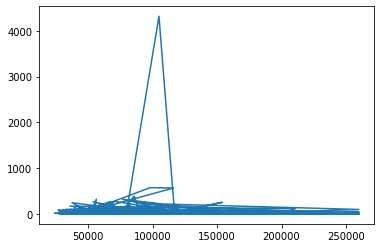

In [599]:
plt.plot(df_joined2.medianincome, df_joined2.rate1)

In [600]:
df_joined2.describe()

,year,rate,rate1,medianincome
count,1513.0,1513.000000,1513.000000,1513.000000
mean,2021.0,22.975445,22.975445,96423.332452
std,0.0,116.956349,116.956349,44555.049254
min,2021.0,0.000000,0.000000,23900.000000
25%,2021.0,1.935001,1.935001,63679.000000
50%,2021.0,12.395132,12.395132,85640.000000
75%,2021.0,22.804217,22.804217,118461.000000
max,2021.0,4318.962689,4318.962689,260000.000000


AttributeError: 'DataFrame' object has no attribute 'sort'